In [1]:
!pip install pandas matplotlib seaborn scikit-learn

Exploratory Data Analysis (EDA) and Business Insights

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------

<ipython-input-3-9c3adfd516de>:25: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_transactions = transactions.resample('M').sum()['TotalValue']


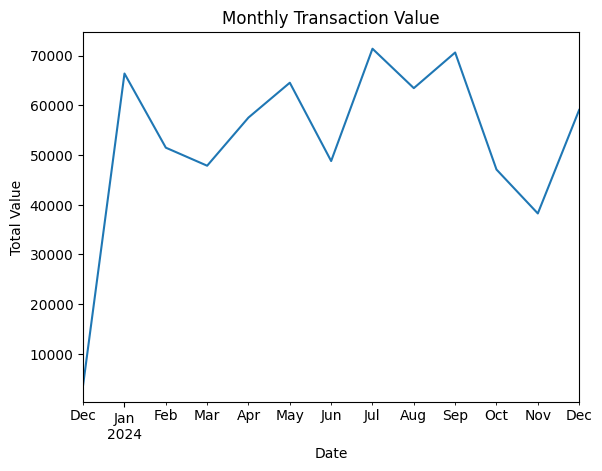

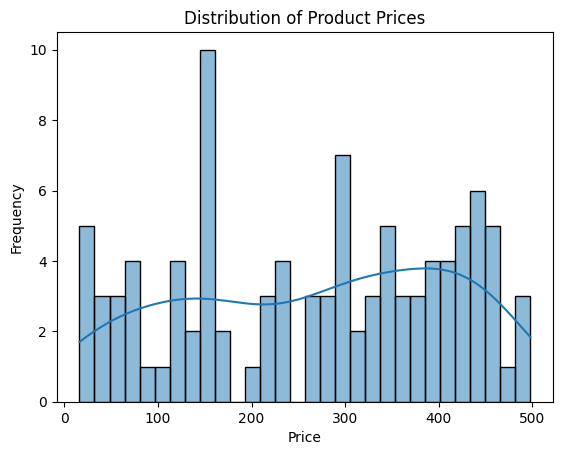

Total Customers: 200
Total Products: 100
Total Transactions: 1000
Average Transaction Value: 690.00
Most Popular Product Category: Books


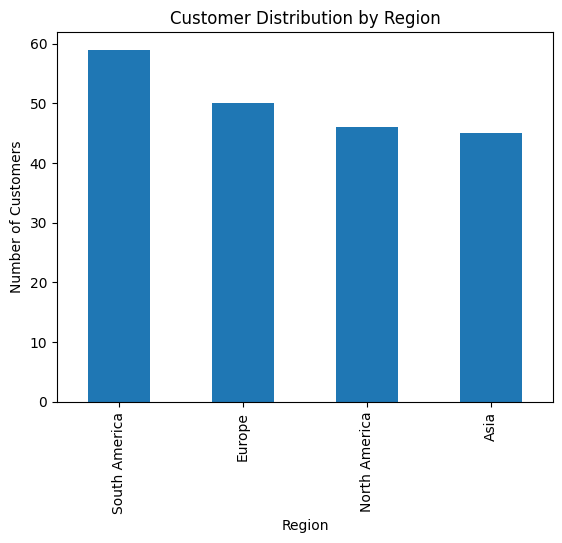

In [3]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')

# Display basic information
print(customers.info())
print(products.info())
print(transactions.info())

# EDA: Summary statistics
print(customers.describe())
print(products.describe())
print(transactions.describe())

# EDA: Visualizations
# Transaction trends over time
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])
transactions.set_index('TransactionDate', inplace=True)
monthly_transactions = transactions.resample('M').sum()['TotalValue']
monthly_transactions.plot(title='Monthly Transaction Value')
plt.xlabel('Date')
plt.ylabel('Total Value')
plt.show()

# Distribution of product prices
sns.histplot(products['Price'], bins=30, kde=True)
plt.title('Distribution of Product Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Insights
# 1. Total number of customers
total_customers = customers['CustomerID'].nunique()
print(f'Total Customers: {total_customers}')

# 2. Total number of products
total_products = products['ProductID'].nunique()
print(f'Total Products: {total_products}')

# 3. Total transactions
total_transactions = transactions['TransactionID'].nunique()
print(f'Total Transactions: {total_transactions}')

# 4. Average transaction value
average_transaction_value = transactions['TotalValue'].mean()
print(f'Average Transaction Value: {average_transaction_value:.2f}')

# 5. Most popular product category
popular_category = transactions.merge(products, on='ProductID')['Category'].mode()[0]
print(f'Most Popular Product Category: {popular_category}')

# 6. Customer distribution by region
region_distribution = customers['Region'].value_counts()
region_distribution.plot(kind='bar', title='Customer Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Number of Customers')
plt.show()